# Best Place for Homer Simpson to Live: Bars

<img src="https://www.animationconnection.com/assets/artwork/1592931864-188-5096-homer-simpson-and-moe-at-bar-pondering.jpg" alt="Homer Simpson sitting at a bar" title="Homer at the Bar" />

### Homer Simpson loves beer, so the best neighborhood in Pittsburgh would have to have the most bars in order to make it the most accessible.

#### In order to figure this out, I used the assets data set. More specifically, I honed in on the section pertaining to restaurants selling alcoholic beverages.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gp
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors

#### I read in the data file and then deduced what the bars and restaurants were titled in the columns

In [2]:
foodFacilities = pd.read_csv("Geocoded Food Facilities.csv")

In [3]:
description = pd.DataFrame(foodFacilities['description'])
dropDupes = description.drop_duplicates()
storesWithLiquor = dropDupes.loc[description['description'].str.contains("(?i)with liquor")]

In [4]:
storesWithLiquor.head(10)

,description
2,Restaurant with Liquor
6,Firehall with Liquor
28,Chain Restaurant with Liquor
595,Pool Snack Bar/With Liquor


#### Here I separated the bars and restaurants from the rest of the data

In [5]:
typeOfPlace = foodFacilities.loc[foodFacilities['description'] == "Restaurant with Liquor"]
typeOfPlace = pd.concat([typeOfPlace,foodFacilities.loc[foodFacilities['description'] == "Chain Restaurant with Liquor"]])
typeOfPlace = pd.concat([typeOfPlace,foodFacilities.loc[foodFacilities['description'] == "Firehall with Liquor"]])
typeOfPlace = pd.concat([typeOfPlace,foodFacilities.loc[foodFacilities['description'] == "Pool Snack Bar/With Liquor"]])
typeOfPlace.sample(3)

,id,facility_name,num,street,city,state,zip,municipal,category_cd,description,...,bus_st_date,bus_cl_date,seat_count,noroom,sq_feet,status,placard_st,x,y,address
8375,57617,Mama Pepino's,44,Monongahela Ave,Glassport,PA,15045.0,Glassport,202,Chain Restaurant with Liquor,...,1998-08-20,NaN,50.0,NaN,NaN,1,1.0,-79.888281,40.339166,44 Monongahela Ave PA 15045
13081,200805010004,Steel City Smokehouse & Saloon,3075,Clairton Blvd / Century III Rm 122,West Mifflin,PA,15123.0,West Mifflin,201,Restaurant with Liquor,...,2008-05-01,NaN,180.0,NaN,NaN,7,NaN,NaN,NaN,3075 Clairton Blvd / Century III Rm 122 PA 15123
23005,201902070003,Dave & Buster's,6260,Northway Drive,Pittsburgh,PA,15237.0,Ross,202,Chain Restaurant with Liquor,...,2019-02-18,NaN,440.0,NaN,NaN,1,1.0,-80.020640,40.550499,6260 Northway Drive PA 15237


In [6]:
typeOfPlace = typeOfPlace.loc[typeOfPlace['city'] == 'Pittsburgh']

addr = typeOfPlace["address"]
municipal = typeOfPlace['municipal']

addr = pd.concat([addr,municipal],axis=1)

#### Removed irrelevent data and removed data that was not labeled as in the city of Pittsburgh

In [7]:
typeOfPlace = typeOfPlace.drop(columns=['id','facility_name','street','state','zip','category_cd','description','p_code','bus_st_date','seat_count','noroom','sq_feet','status','placard_st','x','y','city','address','fdo','bus_cl_date'])
numberOfBars = typeOfPlace.groupby("municipal").count()


#### Renamed municipals

In [22]:
row_labels = {"Pittsburgh-111":"Garfield","Pittsburgh-112":"Larimer","Pittsburgh-113":"Homewood","Pittsburgh-114":"Squirrel Hill","Pittsburgh-115":"Greenfield","Pittsburgh-116":"South Side Slopes","Pittsburgh-117":"South Side Flats","Pittsburgh-118":"Allentown","Pittsburgh-119":"South Shore","Pittsburgh-120":"Banksville","Pittsburgh-121":"Chateau","Pittsburgh-122":"Allegheny Center","Pittsburgh-123":"East Allegheny","Pittsburgh-124":"Spring Hill City View","Pittsburgh-125":"Central North Side","Pittsburgh-126":"Perry South","Pittsburgh-127":"Marshall Shadeland","Pittsburgh-128":"Oakwood","Pittsburgh-129":"Carrick","Pittsburgh-130":"Knoxville","Pittsburgh-131":"Lincoln Place","Pittsburgh-132":"Overbrook","Pittsburgh-101":"Downtown","Pittsburgh-102":"Downtown","Pittsburgh-103":"Downtown","Pittsburgh-104":"Oakland","Pittsburgh-105":"Middle Hill","Pittsburgh-106":"Polish Hill","Pittsburgh-107":"Shadyside","Pittsburgh-108":"Bloomfield","Pittsburgh-109":"Central Lawrenceville","Pittsburgh-110":"Upper Lawrenceville"}
numberOfBars.rename(index = row_labels, inplace=True)
row_labels = {"Allegheny Center":"Allegheny West","Allentown":"Allentown","Banksville":"Banksville","Bloomfield":"Bloomfield","Downtown":"Central Business District","Downtown":"Central Business District","Downtown":"Central Business District","Oakland":"Central Oakland"}
numberOfBars.rename(index = row_labels, inplace=True)
numberOfBars.head(10)

,num
municipal,
Central Business District,526
Allegheny West,247
South Side Flats,149
South Shore,140
South Side Slopes,118
Central Oakland,104
Ross,91
Shadyside,87
Central Lawrenceville,82


In [23]:
numberOfBars = numberOfBars.groupby(['municipal']).sum()

In [24]:
numberOfBars = numberOfBars.sort_values(ascending=False,by="num")

In [36]:
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp")

In [26]:
barsMap = neighborhoods.merge(numberOfBars, how='left', left_on='hood', right_on='municipal')

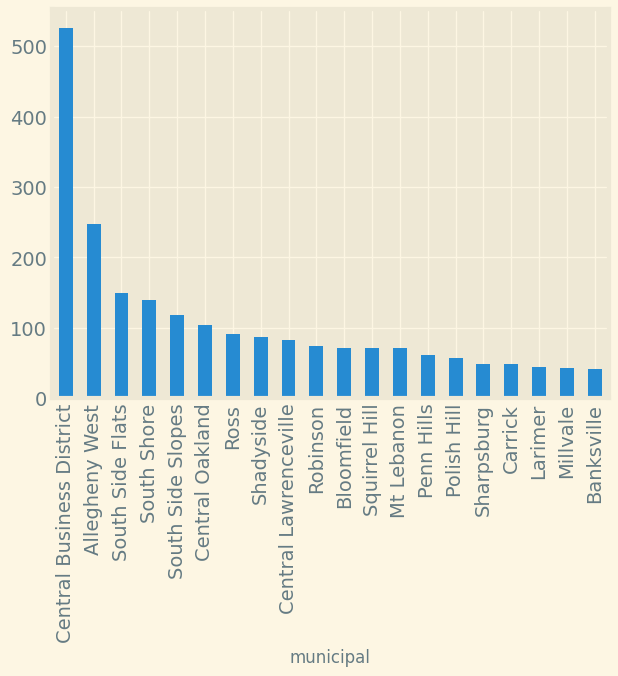

In [27]:
plt.style.use('Solarize_Light2')
numberOfBars.head(20).plot(kind='bar', legend=False)

### As we can see from the bar graph, the Central Business District aka Downtown has the most amount of bars and restaurants that serve alcohol

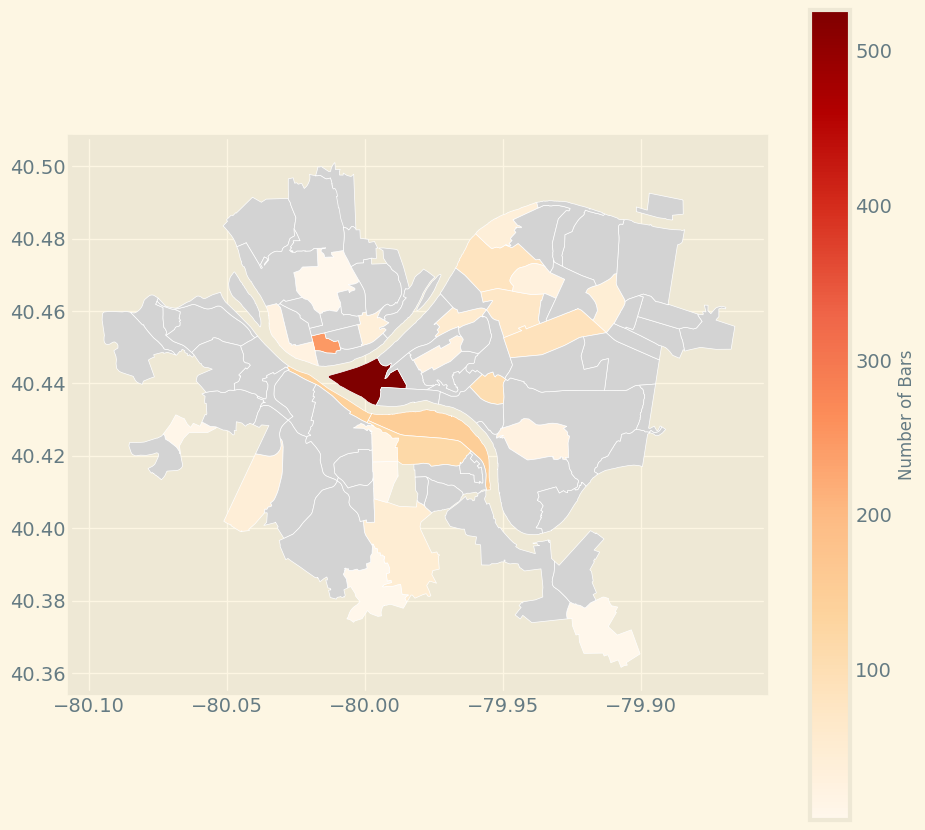

In [35]:
barsMap.plot(column='num', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Bars"}, # label the legend
               figsize=(10, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

### Here we can see how Downtown compares to its neighbors

Based on the information we have about bars, Downtown is clearly the best neighborhood in Pittsburgh since it is densely packed with bars and restaurants that serve alcohol. Looking at the bar graph, one can clearly tell that the majority of neighborhoods in Pittsburgh seem to have less than a fifth of the amount of bars in Downtown.

The top five places include 
1. Downtown
2. Allegheny West
3. Southside Flats
4. South Shore
5. South Side Slopes

Considering the close proximity of Southside Flats, South Shore, and South Side Slopes, one may deduce that it could be a preferable second choice to live over Allegheny West. However, even adding together those neighborhoods, there would still be less bars than in the entire downtown area especially if judging distance.

My favorite neighborhood in Pittsburgh is probably Squirrel Hill because I like to walk around in the interesting and expensive neighborhoods. Overall, Squirrel Hill's amount of bars is not too different than the average neighborhood, but it does place at number 12.